# import important libraries

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# import the dataset

In [10]:
df_train = pd.read_csv("mitbih_train.csv")
df_test = pd.read_csv("mitbih_test.csv")
df_normal = pd.read_csv("ptbdb_normal.csv") 
df_abnormal = pd.read_csv("ptbdb_abnormal.csv")

In [11]:
df_train.shape, df_test.shape, df_normal.shape, df_abnormal.shape

((87553, 188), (21891, 188), (4045, 188), (10505, 188))

In [12]:
df_normal.columns = [str(i) for i in range(len(df_normal.columns))]
df_normal

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.948983,0.505265,0.004176,0.022513,0.059550,0.107298,0.110385,0.111293,0.116558,0.118192,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4040,1.000000,0.929586,0.503550,0.293491,0.169822,0.159763,0.130769,0.125444,0.137278,0.111243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4041,1.000000,0.637579,0.154837,0.061983,0.088965,0.083374,0.065143,0.057365,0.060039,0.060039,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4042,1.000000,0.872574,0.465071,0.232212,0.126132,0.155886,0.174644,0.190168,0.203752,0.168823,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4043,0.915983,0.529373,0.288406,0.144536,0.171802,0.180669,0.177566,0.176458,0.178896,0.180448,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
df_abnormal.columns = [str(i) for i in range(len(df_abnormal.columns))]
df_abnormal

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.951613,0.923963,0.853303,0.791859,0.734255,0.672043,0.685100,0.670507,0.667435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.977819,0.899261,0.230129,0.032348,0.142329,0.223660,0.328096,0.367837,0.381701,0.389094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.935618,0.801661,0.805815,1.000000,0.722741,0.480789,0.454829,0.319834,0.266874,0.308411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.925265,0.433352,0.073620,0.079197,0.136643,0.182934,0.182934,0.182376,0.196877,0.203569,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10500,0.981409,1.000000,0.559171,0.287093,0.196639,0.204862,0.215946,0.243833,0.242760,0.250268,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10501,0.906250,0.922379,0.878024,0.810484,0.712702,0.667339,0.608871,0.527218,0.480847,0.442540,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10502,1.000000,0.867971,0.674122,0.470332,0.296987,0.169307,0.077664,0.081392,0.074868,0.089779,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10503,1.000000,0.984672,0.658888,0.556394,0.446809,0.395790,0.315260,0.276367,0.261039,0.258522,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [14]:
df_normal = df_normal.drop([187])
df_abnormal = df_abnormal.drop([187])

In [15]:
df_train.columns = [str(i) for i in range(len(df_train.columns))]
df_test.columns = [str(i) for i in range(len(df_test.columns))]

# Understand the data

In [16]:
df_train.isnull().sum().to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [17]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.927461,1.000000,0.626943,0.193437,0.094991,0.072539,0.043178,0.053541,0.093264,0.189983,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
flatten_y = df_abnormal.values
flatten_y = flatten_y[:, 5:70].flatten()
flatten_y

array([0.27683616, 0.25343019, 0.18482648, ..., 0.06976745, 0.06078224,
       0.06606765])

# Data Visualization

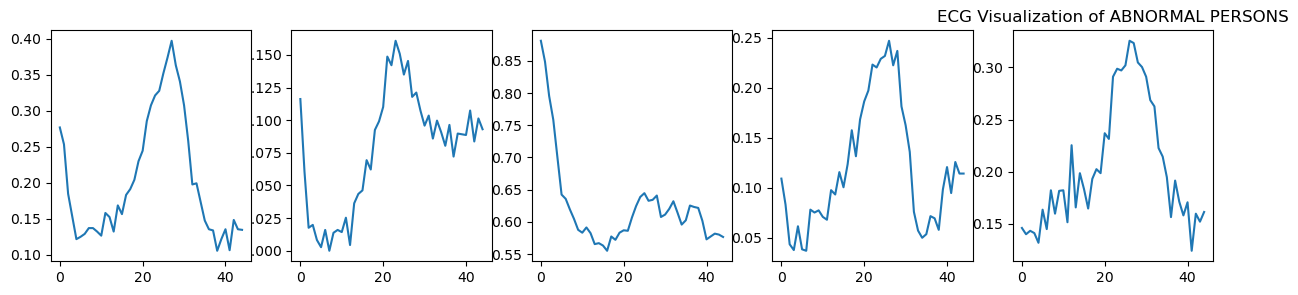

In [19]:
fig, ax = plt.subplots(1, 5, figsize=(15,3))
plt.title('ECG Visualization of ABNORMAL PERSONS')
plt.subplot(1,5,1)
plt.plot(df_abnormal.values[0][5:50])
ax[0].remove()
for i in range(1, 5):
    plt.subplot(1, 5, i + 1)
plt.subplot(1,5,1)
plt.plot(df_abnormal.values[0][5:50])
plt.subplot(1,5,2)
plt.plot(df_abnormal.values[10][5:50])
plt.subplot(1,5,3)
plt.plot(df_abnormal.values[15][5:50])
plt.subplot(1,5,4)
plt.plot(df_abnormal.values[20][5:50])
plt.subplot(1,5,5)
plt.plot(df_abnormal.values[30][5:50])

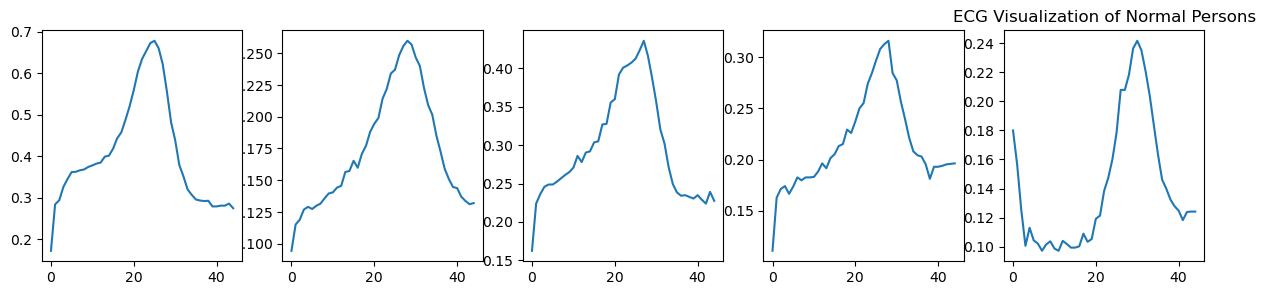

In [20]:
fig, ax = plt.subplots(1, 5, figsize=(15,3))
plt.title('ECG Visualization of Normal Persons')
plt.subplot(1, 5, 1)
plt.plot(df_normal.values[0][5:50])
ax[0].remove()
for i in range(1, 5):
    plt.subplot(1, 5, i + 1)
plt.subplot(1, 5, 1)
plt.plot(df_normal.values[0][5:50])
plt.subplot(1, 5, 2)
plt.plot(df_normal.values[10][5:50])
plt.subplot(1, 5, 3)
plt.plot(df_normal.values[20][5:50])
plt.subplot(1, 5, 4)
plt.plot(df_normal.values[40][5:50])
plt.subplot(1, 5, 5)
plt.plot(df_normal.values[77][5:50])
plt.show()

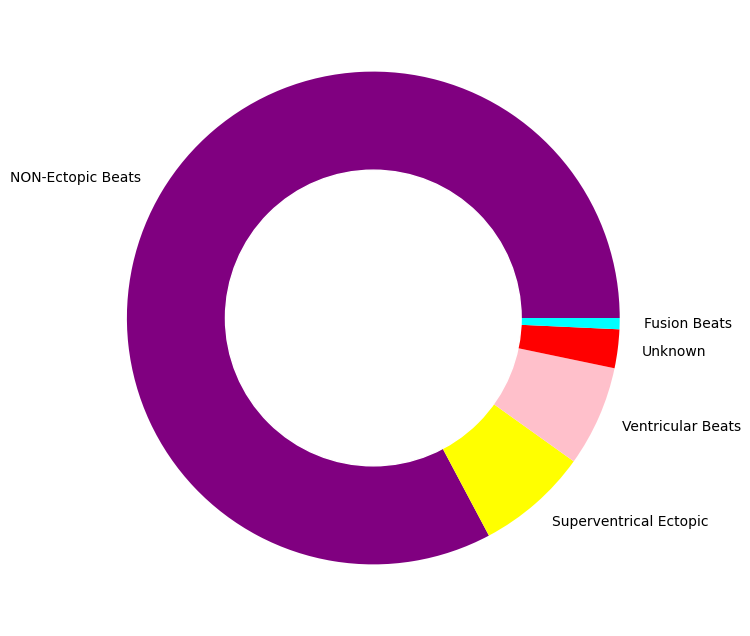

In [21]:
plt.figure(figsize=(10,8))
circle = plt.Circle((0,0), 0.6, color='white')
column_index=187
plt.pie(df_train.iloc[:,column_index].value_counts(), labels=['NON-Ectopic Beats', 'Superventrical Ectopic', 'Ventricular Beats', 'Unknown', 'Fusion Beats'],
                                        colors=['purple','yellow','pink', 'red','cyan'])
p = plt.gcf()
p.gca().add_artist(circle)
plt.show()

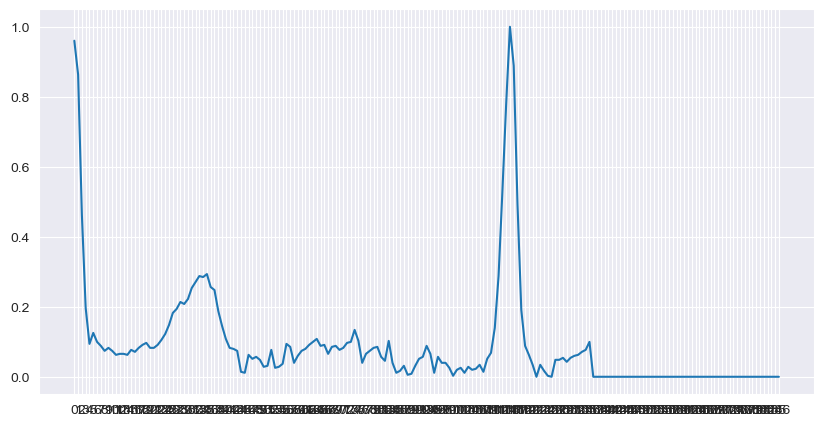

In [22]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
plt.plot(df_train.iloc[0, 0:187])

In [23]:
#class label
column_index = 187
df_1 = df_train[df_train.iloc[:, column_index] == 1]
df_2 = df_train[df_train.iloc[:, column_index] == 2]
df_3 = df_train[df_train.iloc[:, column_index] == 3]
df_4 = df_train[df_train.iloc[:, column_index] == 4]

In [24]:
df_1.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
72470,1.000000,0.666667,0.100457,0.036530,0.073059,0.050228,0.018265,0.105023,0.132420,0.091324,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.0
72471,0.983696,1.000000,0.331522,0.000000,0.108696,0.163043,0.130435,0.190217,0.288043,0.222826,...,0.461957,0.483696,0.500000,0.494565,0.510870,0.51087,0.505435,0.472826,0.434783,1.0
72472,1.000000,0.911504,0.216814,0.000000,0.101770,0.199115,0.176991,0.194690,0.252212,0.238938,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.0
72473,0.090498,0.126697,0.217195,0.361991,0.461538,0.556561,0.443439,0.434389,0.452489,0.511312,...,0.122172,0.131222,0.140271,0.158371,0.176471,0.20362,0.212670,0.000000,0.000000,1.0
72474,0.961111,1.000000,0.551852,0.101852,0.040741,0.085185,0.094444,0.088889,0.085185,0.070370,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.0


In [25]:
df_2.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
74693,0.000000,0.009756,0.074390,0.162195,0.240244,0.291463,0.370732,0.442683,0.498780,0.560976,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
74694,1.000000,0.865672,0.660448,0.458955,0.242537,0.126866,0.164179,0.242537,0.298507,0.350746,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
74695,0.556728,0.530343,0.440633,0.290237,0.171504,0.055409,0.005277,0.042216,0.000000,0.013193,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
74696,1.000000,0.968031,0.782609,0.512788,0.418159,0.381074,0.347826,0.320972,0.312020,0.295396,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
74697,0.000000,0.037681,0.101449,0.215942,0.236232,0.349275,0.389855,0.485507,0.539130,0.601449,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [26]:
df_3.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
80481,1.000000,0.899749,0.641604,0.314536,0.101504,0.107769,0.111529,0.071429,0.063910,0.058897,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
80482,0.732252,1.000000,0.983773,0.484787,0.178499,0.111562,0.081136,0.050710,0.046653,0.046653,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
80483,0.991984,1.000000,0.601202,0.280561,0.158317,0.146293,0.104208,0.090180,0.080160,0.070140,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
80484,0.778378,0.528378,0.258108,0.128378,0.000000,0.037838,0.167568,0.235135,0.227027,0.222973,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
80485,1.000000,0.914931,0.531250,0.303819,0.178819,0.157986,0.128472,0.126736,0.118056,0.111111,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0


In [27]:
df_4.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
81122,0.712610,0.629032,0.527859,0.414956,0.284457,0.164223,0.080645,0.032258,0.000000,0.016129,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
81123,1.000000,0.484848,0.541667,0.526515,0.522727,0.507576,0.496212,0.412879,0.284091,0.140152,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
81124,0.584046,0.500000,0.424501,0.324786,0.233618,0.128205,0.049858,0.000000,0.000000,0.028490,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
81125,1.000000,0.936170,0.878598,0.813517,0.727159,0.607009,0.496871,0.365457,0.272841,0.232791,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
81126,0.680412,0.584192,0.491409,0.379725,0.269759,0.149485,0.072165,0.012027,0.000000,0.012027,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [28]:
df_1.shape, df_2.shape, df_3.shape, df_4.shape

((2223, 188), (5788, 188), (641, 188), (6431, 188))

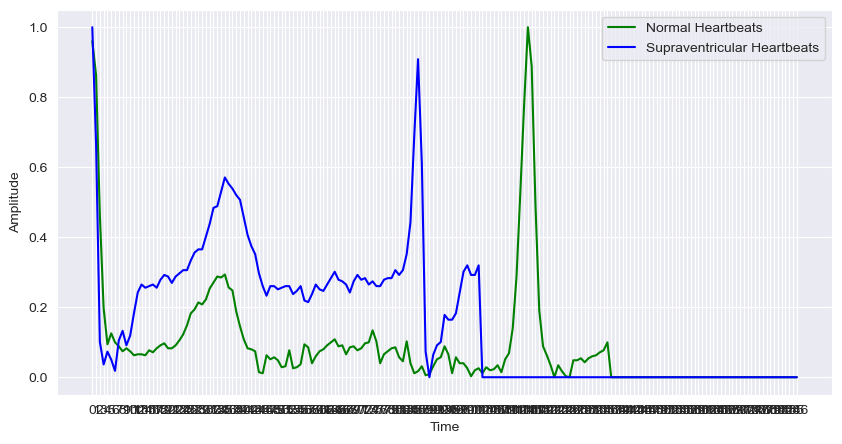

In [29]:
sns.set_style('darkgrid')
plt.figure(figsize=(10, 5))
plt.plot(df_train.iloc[0, 0:187], color='green', label='Normal Heartbeats')
plt.plot(df_1.iloc[0, 0:187], color='blue', label='Supraventricular Heartbeats')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

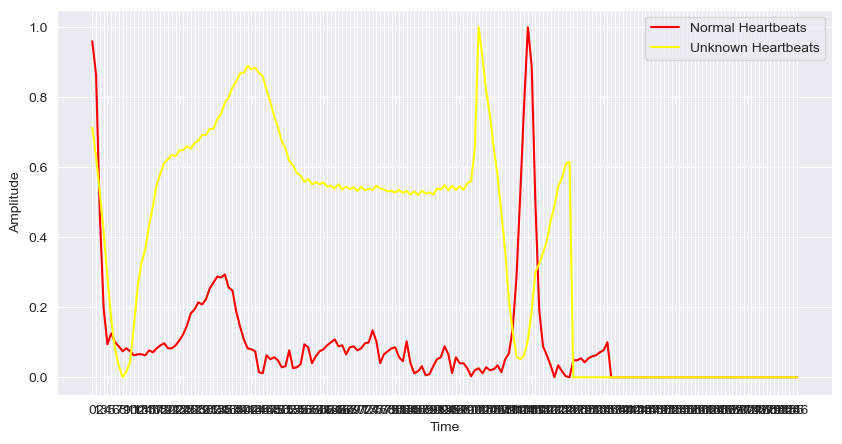

In [30]:
sns.set_style('darkgrid')
plt.figure(figsize=(10, 5))
plt.plot(df_train.iloc[0, 0:187], color='red', label='Normal Heartbeats')
plt.plot(df_4.iloc[0, 0:187], color='yellow', label='Unknown Heartbeats')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

In [31]:
y_abnormal = np.ones(df_abnormal.shape[0])
y_abnormal = pd.DataFrame(y_abnormal)
y_normal = np.zeros(df_normal.shape[0])
y_normal = pd.DataFrame(y_normal)
X = pd.concat([df_abnormal, df_normal], sort=True)
y = pd.concat([y_abnormal, y_normal], sort=True)

In [32]:
X.head()

,0,1,10,100,101,102,103,104,105,106,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,0.606941,0.125101,0.140436,0.111380,0.162228,0.123487,0.138015,0.064568,0.087974,...,0.093624,0.117837,0.086360,0.138015,0.099274,0.083132,0.069411,0.078289,0.053269,0.096045
1,1.000000,0.951613,0.681260,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.589862,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.977819,0.899261,0.357671,1.000000,0.402957,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.256007,0.265250,0.279113,0.293900,0.269871,0.238447,0.276340,0.426987,0.463031,0.643253
3,0.935618,0.801661,0.285566,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.925265,0.433352,0.214724,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.192415,0.193530,0.172337,0.191857,0.197434,0.208031,0.000000,0.000000,0.000000,0.000000


In [33]:
y.head()

,0
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [34]:
X.shape, y.shape

((14548, 188), (14548, 1))

In [35]:
from sklearn.utils import resample
df1_resam = resample(df_1, n_samples=20000, 
                           random_state=123, replace=True)
df2_resam = resample(df_2, n_samples=20000, 
                           random_state=123, replace=True)
df3_resam = resample(df_3, n_samples=20000, 
                           random_state=123, replace=True)
df4_resam = resample(df_4, n_samples=20000, 
                           random_state=123, replace=True)
column_index=187
df_0 = df_train[df_train.iloc[:, column_index]==0].sample(n=20000, random_state=123, replace=True)

In [36]:
df_train = pd.concat([df_0, df1_resam, df2_resam, df3_resam, df4_resam])

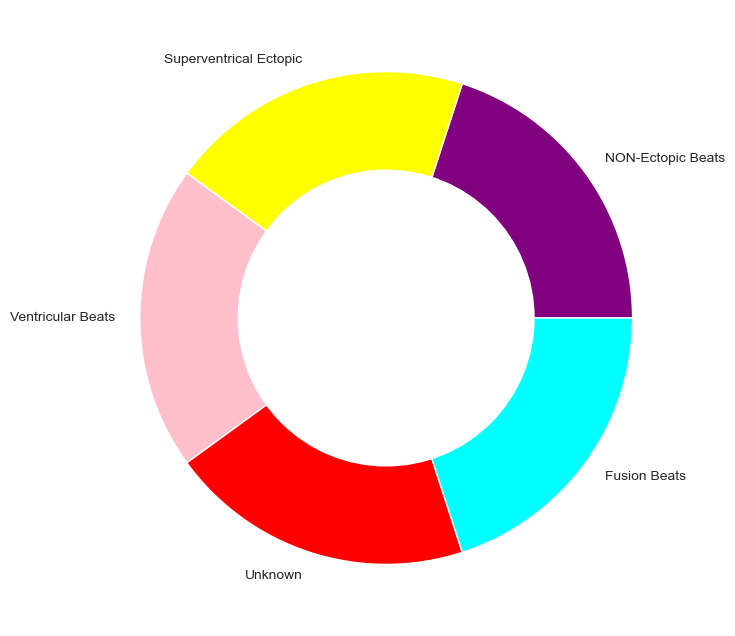

In [37]:
plt.figure(figsize=(10,8))
circle = plt.Circle((0,0), 0.6, color='white')
column_index=187
plt.pie(df_train.iloc[:,column_index].value_counts(), labels=['NON-Ectopic Beats', 'Superventrical Ectopic', 'Ventricular Beats', 'Unknown', 'Fusion Beats'],
                                        colors=['purple','yellow','pink', 'red','cyan'])
p = plt.gcf()
p.gca().add_artist(circle)
plt.show()

In [38]:
target_train = df_train.iloc[:,187]
target_test = df_test.iloc[:,187]
target_train.unique()

array([0., 1., 2., 3., 4.])

In [39]:
y_train = pd.get_dummies(target_train)
y_test = pd.get_dummies(target_test)
y_train[:4]
y_test[:4]

,0.0,1.0,2.0,3.0,4.0
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0


In [40]:
X_train = df_train.iloc[:, :-1].values
X_test = df_test.iloc[:, :-1].values

In [41]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(100000, 187)
(21891, 187)
(100000, 5)
(21891, 5)


# Applying the models

using cnn model

In [36]:
X_train = X_train.reshape(len(X_train), X_train.shape[1], 1)
X_test = X_test.reshape(len(X_test), X_test.shape[1], 1)
X_train.shape, X_test.shape

((100000, 187, 1), (21891, 187, 1))

In [37]:
from keras.models import Sequential
from keras.layers import Conv2D, Conv1D, MaxPooling2D, MaxPooling1D, Flatten, BatchNormalization, Dense
from keras.callbacks import CSVLogger, ModelCheckpoint

In [38]:
def model():
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=6, activation='relu', 
                    padding='same', input_shape=(187, 1)))
    model.add(BatchNormalization())
    
    model.add(MaxPooling1D(pool_size=(3), strides=2, padding='same'))
    
    model.add(Conv1D(filters=64, kernel_size=6, activation='relu', 
                    padding='same', input_shape=(187, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(3), strides=2, padding='same'))
    
    model.add(Conv1D(filters=64, kernel_size=6, activation='relu', 
                    padding='same', input_shape=(187, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(3), strides=2, padding='same'))
    
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(5, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [39]:
model = model()
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 187, 64)           448       
                                                                 
 batch_normalization (Batch  (None, 187, 64)           256       
 Normalization)                                                  
                                                                 
 max_pooling1d (MaxPooling1  (None, 94, 64)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 94, 64)            24640     
                                                                 
 batch_normalization_1 (Bat  (None, 94, 64)            256       
 chNormalization)                                                
                                                     

In [40]:
logger = CSVLogger('logs.csv', append=True)
his = model.fit(X_train, y_train, epochs=50, batch_size=32, 
          validation_data=(X_test, y_test), callbacks=[logger])

Epoch 1/50


3125/3125 [==============================] - 35s 11ms/step - loss: 0.1846 - accuracy: 0.9336 - val_loss: 0.1342 - val_accuracy: 0.9557
Epoch 2/50
3125/3125 [==============================] - 31s 10ms/step - loss: 0.0727 - accuracy: 0.9745 - val_loss: 0.1417 - val_accuracy: 0.9559
Epoch 3/50
3125/3125 [==============================] - 31s 10ms/step - loss: 0.0487 - accuracy: 0.9839 - val_loss: 0.1188 - val_accuracy: 0.9663
Epoch 4/50
3125/3125 [==============================] - 27s 9ms/step - loss: 0.0372 - accuracy: 0.9876 - val_loss: 0.1452 - val_accuracy: 0.9633
Epoch 5/50
3125/3125 [==============================] - 23s 7ms/step - loss: 0.0310 - accuracy: 0.9903 - val_loss: 0.1267 - val_accuracy: 0.9683
Epoch 6/50
3125/3125 [==============================] - 24s 8ms/step - loss: 0.0243 - accuracy: 0.9924 - val_loss: 0.1372 - val_accuracy: 0.9702
Epoch 7/50
3125/3125 [==============================] - 24s 8ms/step - loss: 0.0233 - accuracy: 0.9927 - val_loss: 0.1200 - v

In [41]:
model.evaluate(X_test, y_test)

685/685 [==============================] - 2s 2ms/step - loss: 0.2332 - accuracy: 0.9765


[0.23321306705474854, 0.9764743447303772]

In [42]:
history = his.history
history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

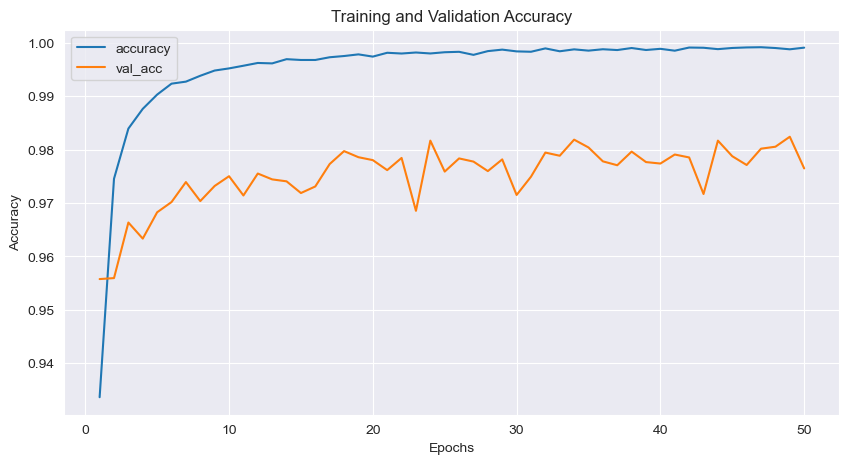

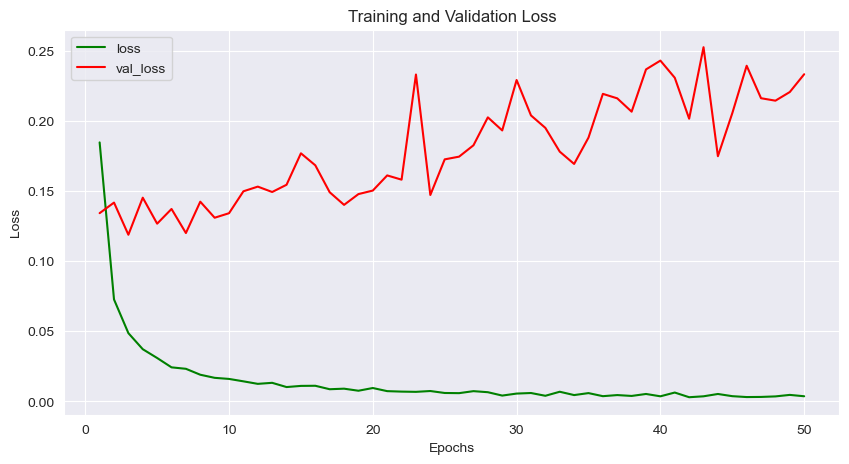

In [43]:
epochs = range(1, len(history['loss']) + 1)
acc = history['accuracy']
loss = history['loss']
val_acc = history['val_accuracy']
val_loss = history['val_loss']

plt.figure(figsize=(10, 5))
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, acc, label='accuracy')
plt.plot(epochs, val_acc, label='val_acc')
plt.legend()

plt.figure(figsize=(10, 5))
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(epochs, loss, label='loss', color='g')
plt.plot(epochs, val_loss, label='val_loss', color='r')
plt.legend()

In [64]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_true = np.argmax(y_test.values, axis=1)  # Convert one-hot encoded y_test to labels

conf_matrix = confusion_matrix(y_true, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[18117     0     0     0     0]
 [    0   556     0     0     0]
 [    0     0  1448     0     0]
 [    0     0     0   162     0]
 [    0     0     0     0  1608]]


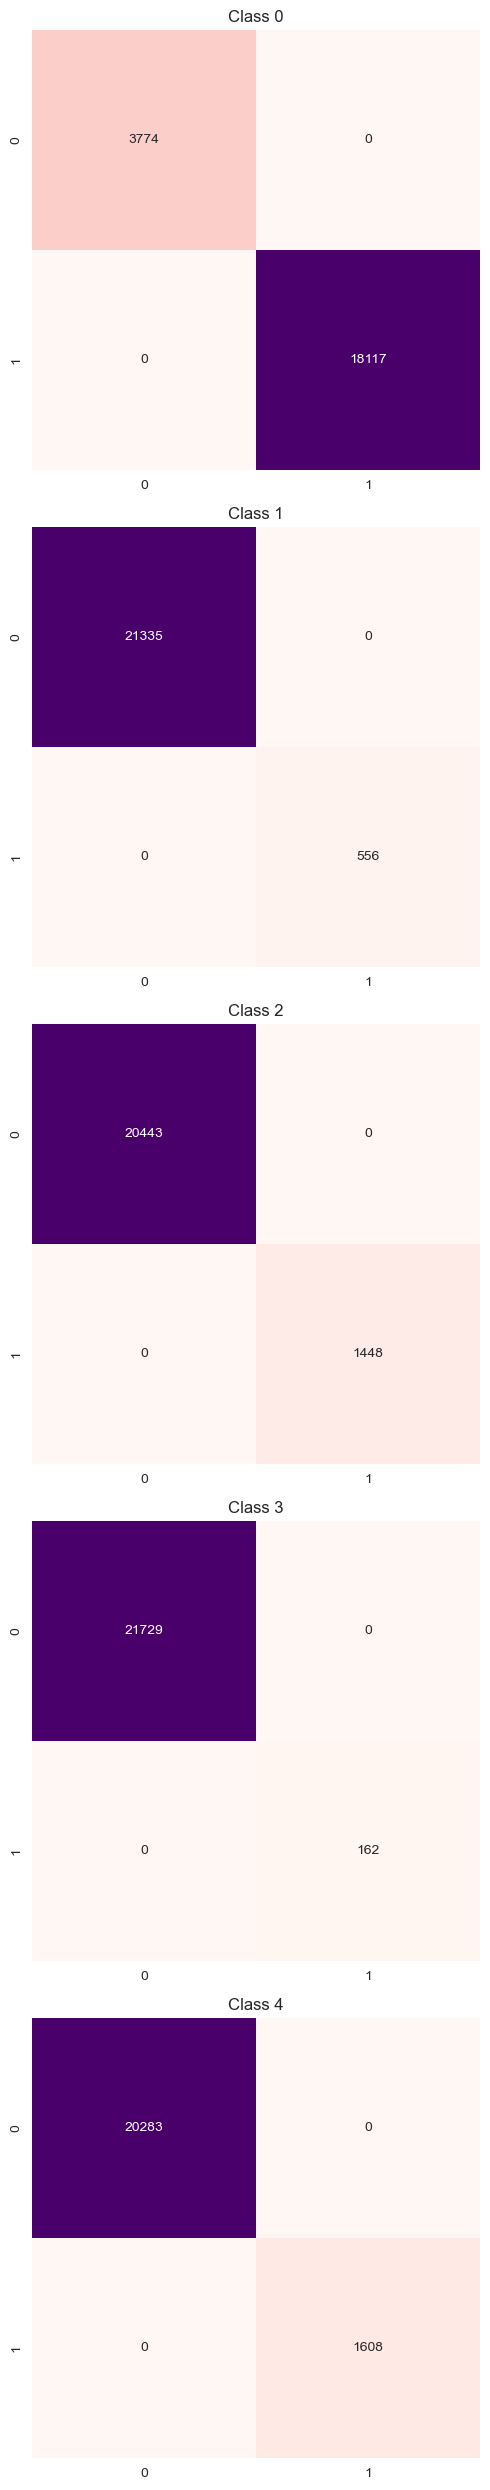

In [66]:
from sklearn.metrics import multilabel_confusion_matrix

multilabel_conf_matrix = multilabel_confusion_matrix(y_true, y_pred)
num_classes = multilabel_conf_matrix.shape[0]

plt.figure(figsize=(5, 5 * num_classes))
for i in range(num_classes):
    plt.subplot(num_classes, 1, i + 1)
    sns.heatmap(multilabel_conf_matrix[i, :, :], annot=True, fmt='0.0f', cmap='RdPu', cbar=False)
    plt.title(f'Class {i}')

plt.tight_layout()
plt.show()

# random forest 

In [43]:
from sklearn.ensemble import RandomForestClassifier
import time

X_train_reshaped = X_train.reshape((X_train.shape[0], -1))

print("Reshaped X_train shape:", X_train_reshaped.shape)
print("y_train shape:", y_train.shape)


Reshaped X_train shape: (100000, 187)
y_train shape: (100000, 5)


In [49]:
start = time.time()

rf = RandomForestClassifier()
rf.fit(X_train_reshaped, y_train)

end = time.time()
print('Time Taken: %.3f seconds' % (end - start))

Time Taken: 223.297 seconds


In [50]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [51]:
start = time.time()

X_test_reshaped = X_test.reshape((X_test.shape[0], -1))
y_pred = rf.predict(X_test_reshaped)

end = time.time()
print('Time Taken: %.3f seconds' % (end-start))

y_pred[:10]

Time Taken: 1.929 seconds


array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0]], dtype=uint8)

In [52]:
print('Accuracy on train data: %.4f' % rf.score(X_train_reshaped, y_train))
print('Accuracy on test data %.4f' % rf.score(X_test_reshaped, y_test))

Accuracy on train data: 1.0000
Accuracy on test data 0.9686
